In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix , f1_score,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/employee-attrition-data/Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [6]:
data.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [7]:
data.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [8]:
data.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [9]:
data.Attrition.value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [10]:
X = data.drop(['Attrition'],axis=1)
y = data['Attrition']

In [11]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,True,False,False,False,True,True,False,True
1,49,279,8,1,1,2,3,61,2,2,...,False,True,False,False,False,True,False,True,True,False
2,37,1373,2,2,1,4,4,92,2,1,...,False,False,False,False,False,False,True,True,False,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,True,False,False,False,True,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,False,False,False,False,False,True,False,True,True,False


In [12]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train , y_test = train_test_split(X_dummies,y,
                                                      test_size=0.3,random_state=80,stratify=y)


In [13]:
y_train.value_counts(normalize=True)


Attrition
No     0.838678
Yes    0.161322
Name: proportion, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

Attrition
No     0.839002
Yes    0.160998
Name: proportion, dtype: float64

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=80)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=80)

In [16]:
pd.Series(clf.feature_importances_,index = X_dummies.columns).sort_values(ascending=False).head(10)

OverTime_No                       0.315798
JobLevel                          0.254092
StockOptionLevel                  0.116560
YearsInCurrentRole                0.091908
JobRole_Sales Executive           0.087775
YearsWithCurrManager              0.085733
DailyRate                         0.048134
Age                               0.000000
Gender_Male                       0.000000
EducationField_Human Resources    0.000000
dtype: float64

In [17]:
y_pred = clf.predict(X_test)

In [18]:
cm = confusion_matrix(y_test,y_pred)
print("ConFusionMatrix is : - ",cm,sep='\n')

ConFusionMatrix is : - 
[[364   6]
 [ 63   8]]


In [19]:
print("Accuracy (in %) :-  ",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy (in %) :-   84.35374149659864


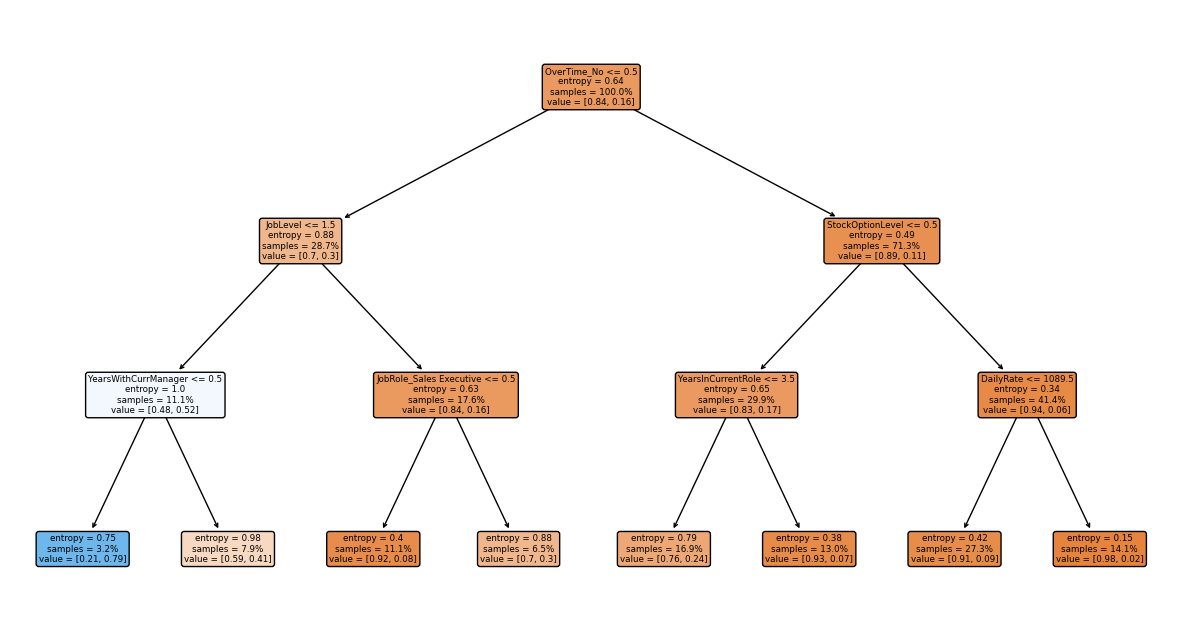

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree
import matplotlib.pyplot as plt
cols = X_dummies.columns

plt.figure(figsize=(15,8))
tree.plot_tree(clf,feature_names=cols,filled =True , precision = 2,
               proportion=True,rounded =True)
plt.show()